# PROJECT

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

/Users/beyzanurcam/Desktop/dersler/görüntü işleme/Image_Processing/BEYZANUR_CAM_PRJ


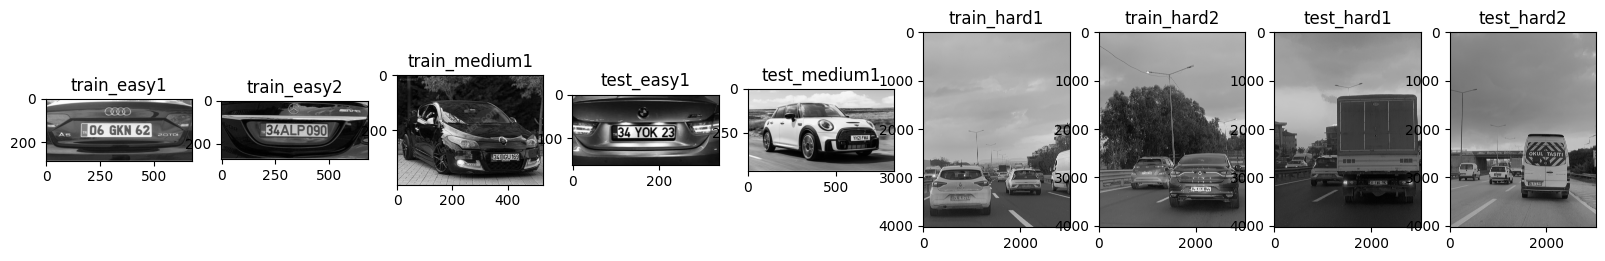

In [ ]:
train_easy1 = cv2.imread('images_gray/train_images/train_easy1.jpg')
train_easy2 = cv2.imread('images_gray/train_images/train_easy2.jpg')
train_medium1 = cv2.imread('images_gray/train_images/train_medium1.jpg')
train_hard1 = cv2.imread('images_gray/train_images/train_hard_1.jpeg')
train_hard2 = cv2.imread('images_gray/train_images/train_hard_2.jpeg')

test_easy1= cv2.imread('images_gray/test_images/test_easy1.jpg')
test_medium1 = cv2.imread('images_gray/test_images/test_medium1.jpg')
test_hard1 = cv2.imread('images_gray/test_images/test_hard_1.jpeg')
test_hard2 = cv2.imread('images_gray/test_images/test_hard_2.jpeg')

train_easy1_gray = cv2.cvtColor(train_easy1, cv2.COLOR_BGR2GRAY)
train_easy2_gray = cv2.cvtColor(train_easy2, cv2.COLOR_BGR2GRAY)
train_medium1_gray = cv2.cvtColor(train_medium1, cv2.COLOR_BGR2GRAY)
train_hard1_gray = cv2.cvtColor(train_hard1, cv2.COLOR_BGR2GRAY)
train_hard2_gray = cv2.cvtColor(train_hard2, cv2.COLOR_BGR2GRAY)

test_easy1_gray = cv2.cvtColor(test_easy1, cv2.COLOR_BGR2GRAY)
test_medium1_gray = cv2.cvtColor(test_medium1, cv2.COLOR_BGR2GRAY)
test_hard1_gray = cv2.cvtColor(test_hard1, cv2.COLOR_BGR2GRAY)
test_hard2_gray = cv2.cvtColor(test_hard2, cv2.COLOR_BGR2GRAY)

images = [train_easy1, train_easy2, train_medium1, test_easy1, test_medium1, train_hard1, train_hard2, test_hard1, test_hard2]
titles = ['train_easy1', 'train_easy2', 'train_medium1', 'test_easy1', 'test_medium1', 'train_hard1', 'train_hard2', 'test_hard1', 'test_hard2']

fig, axes = plt.subplots(1, len(images), figsize=(20, 5))

for ax, img, title in zip(axes, images, titles):
	if img is not None:
		ax.imshow(img, cmap='gray')
		ax.axis('on')
		ax.set_title(title)
	else:
		ax.text(0.5, 0.5, 'Image not found', fontsize=12, ha='center')
		ax.axis('off')

plt.show()

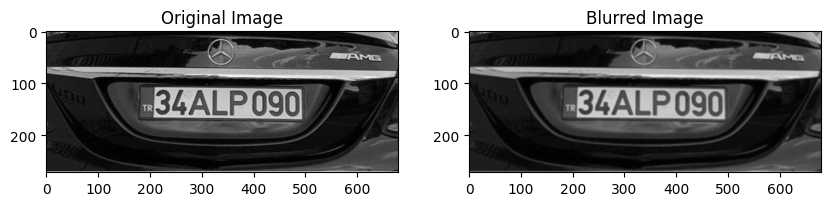

In [4]:
blurred_train_easy1 = cv2.GaussianBlur(train_easy2, (5, 5), 0)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(train_easy2, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(blurred_train_easy1, cmap='gray')
plt.title('Blurred Image')

plt.show()

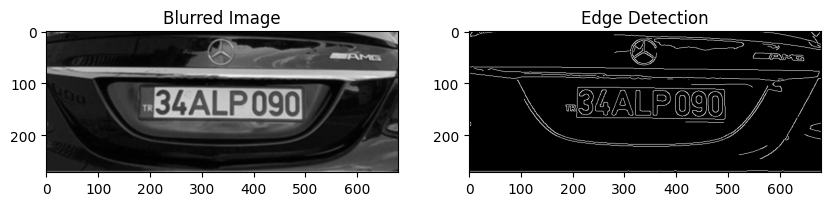

In [5]:
edges = cv2.Canny(blurred_train_easy1, 100, 200)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(blurred_train_easy1, cmap='gray')
plt.title('Blurred Image')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')

plt.show()

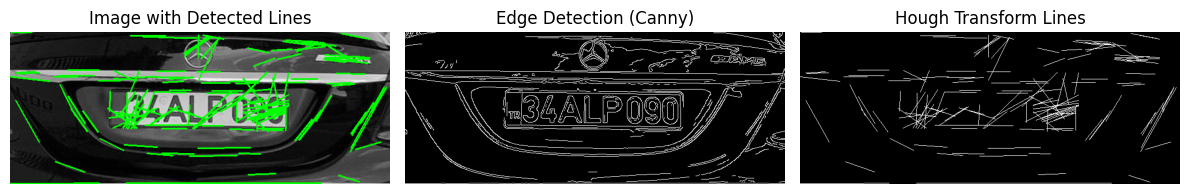

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Load the image
image = cv2.imread('images_gray/train_images/train_easy2.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 100, 150)

# Detect lines using Hough Transform
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=1, minLineLength=35, maxLineGap=10)

# Draw lines on the image
if lines is not None:
    lines = [line[0] for line in lines]  # Simplify lines array
    for x1, y1, x2, y2 in lines:
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green lines for visibility

    # Optionally, you can use itertools to find line intersections and rectangles
    # For simplicity, rectangle detection logic is omitted
    rectangles = []
    for line1, line2 in itertools.combinations(lines, 2):
        # Compute intersections and check if they form valid rectangles
        pass  # Add geometry check for rectangle logic

    # Draw rectangles (if any found)
    for rect in rectangles:
        cv2.polylines(image, [np.array(rect, dtype=np.int32)], isClosed=True, color=(0, 0, 255), thickness=2)

# Plot the results
plt.figure(figsize=(12, 6))

# Display the original image with detected lines
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert to RGB for correct display in matplotlib
plt.title('Image with Detected Lines')
plt.axis('off')

# Display the edge-detected image (Canny edges)
plt.subplot(1, 3, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection (Canny)')
plt.axis('off')

# Display the lines (if necessary, you can plot only the lines)
line_image = np.zeros_like(image)
if lines is not None:
    for x1, y1, x2, y2 in lines:
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 255, 255), 1)  # White lines

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title('Hough Transform Lines')
plt.axis('off')

plt.tight_layout()
plt.show()


In [7]:
train_easy1 = cv2.imread('images_gray/train_images/train_easy1.jpg')
train_easy2 = cv2.imread('images_gray/train_images/train_easy2.jpg')
train_medium1 = cv2.imread('images_gray/train_images/train_medium1.jpg')

test_easy1= cv2.imread('images_gray/test_images/test_easy1.jpg')
test_medium1 = cv2.imread('images_gray/test_images/test_medium1.jpg')

train_easy1_gray = cv2.cvtColor(train_easy1, cv2.COLOR_BGR2GRAY)
train_easy2_gray = cv2.cvtColor(train_easy2, cv2.COLOR_BGR2GRAY)
train_medium1_gray = cv2.cvtColor(train_medium1, cv2.COLOR_BGR2GRAY)

test_easy1_gray = cv2.cvtColor(test_easy1, cv2.COLOR_BGR2GRAY)
test_medium1_gray = cv2.cvtColor(test_medium1, cv2.COLOR_BGR2GRAY)

images = [train_easy1, train_easy2, train_medium1, test_easy1, test_medium1]
titles = ['train_easy1', 'train_easy2', 'train_medium1', 'test_easy1', 'test_medium1']

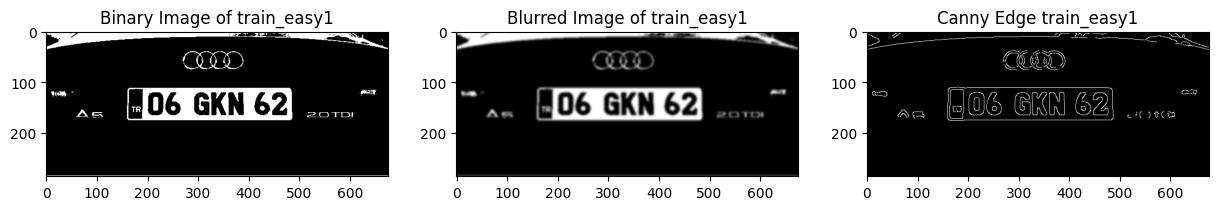

In [8]:
# Convert the image to grayscale if it is not already
gray_train_easy1 = cv2.cvtColor(train_easy1, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding
_, binary_train_easy1 = cv2.threshold(gray_train_easy1, 180, 255, cv2.THRESH_BINARY)
blurred_train_easy1 = cv2.GaussianBlur(binary_train_easy1, (11, 11), 0)
binary_after_edges = cv2.Canny(blurred_train_easy1, 170, 250)

# Plot the binary image
plt.figure(figsize=(15, 15))

plt.subplot(1,3,1)
plt.imshow(binary_train_easy1, cmap='gray')
plt.title('Binary Image of train_easy1')

plt.subplot(1, 3, 2)
plt.imshow(blurred_train_easy1, cmap='gray')
plt.title('Blurred Image of train_easy1')

plt.subplot(1,3,3)
plt.imshow(binary_after_edges, cmap='gray')
plt.title('Canny Edge train_easy1')
plt.show()

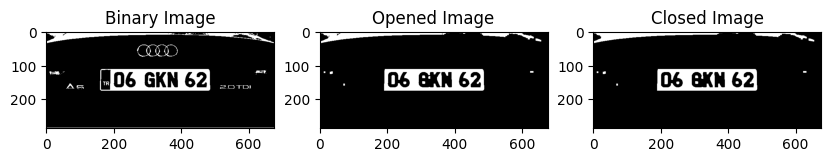

In [9]:
# Yapı elemanı oluşturma (örneğin, 3x3 boyutunda bir kare)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Morfolojik açma işlemi
opened_image = cv2.morphologyEx(binary_train_easy1, cv2.MORPH_OPEN, kernel)
# Morfolojik kapama işlemi
closed_image = cv2.morphologyEx(opened_image, cv2.MORPH_CLOSE, kernel)

# Sonucu görselleştirme
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(binary_train_easy1, cmap='gray')
plt.title('Binary Image')

plt.subplot(1, 3, 2)
plt.imshow(opened_image, cmap='gray')
plt.title('Opened Image')

plt.subplot(1, 3, 3)
plt.imshow(closed_image, cmap='gray')
plt.title('Closed Image')

plt.show()

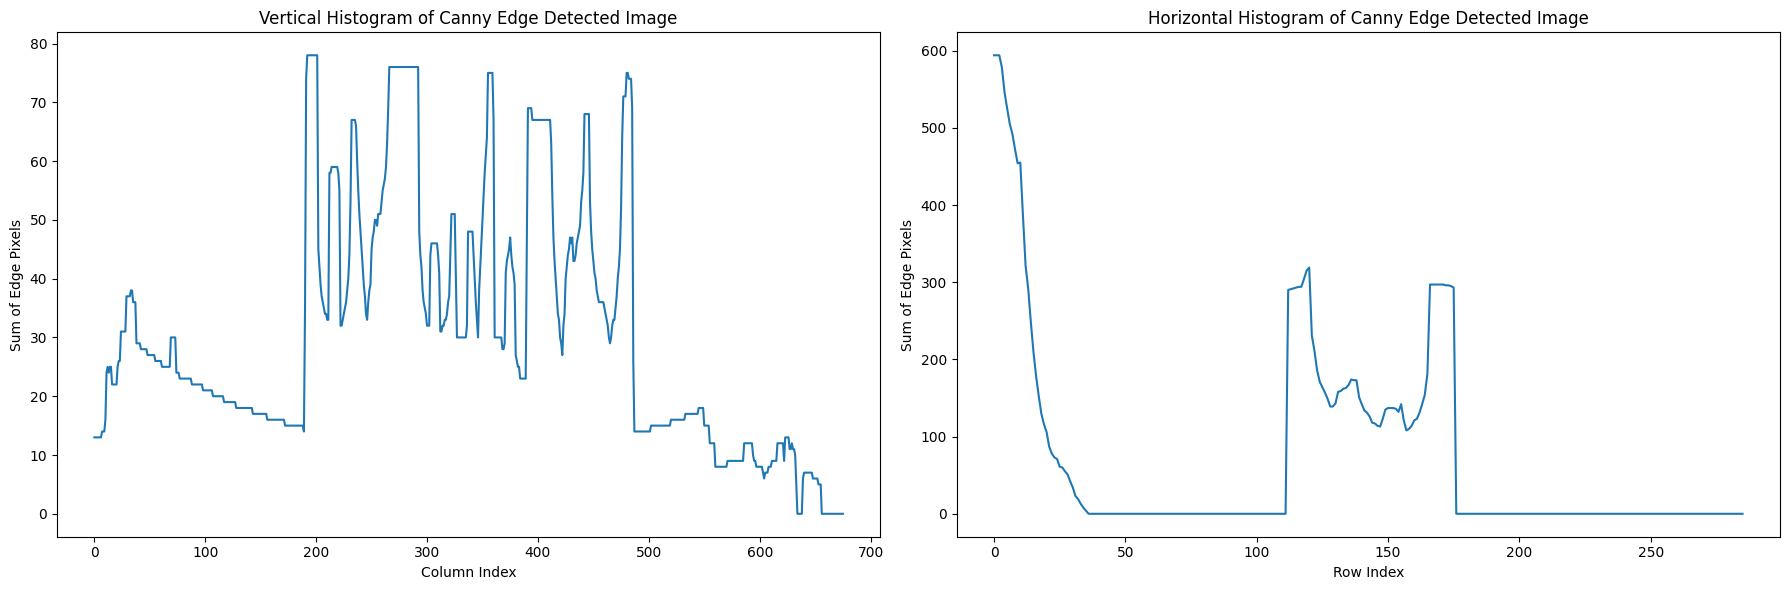

In [10]:
# Calculate the histogram for vertical and horizontal directions
horizontal_hist = np.sum(closed_image == 255, axis=1)  # Her satırdaki beyaz piksel sayısı

# Vertical histogram
vertical_hist = np.sum(closed_image == 255, axis=0)  # Her sütundaki beyaz piksel sayısı

# Plot the histograms
plt.figure(figsize=(18, 6))

# Plot the vertical histogram
plt.subplot(1, 2, 1)
plt.plot(vertical_hist)
plt.title('Vertical Histogram of Canny Edge Detected Image')
plt.xlabel('Column Index')
plt.ylabel('Sum of Edge Pixels')

# Plot the horizontal histogram
plt.subplot(1, 2, 2)
plt.plot(horizontal_hist)
plt.title('Horizontal Histogram of Canny Edge Detected Image')
plt.xlabel('Row Index')
plt.ylabel('Sum of Edge Pixels')

plt.tight_layout()
plt.show()

1.0
1.0
4.851851851851852
2.35
2.0
1.5
3.0
1.1666666666666667


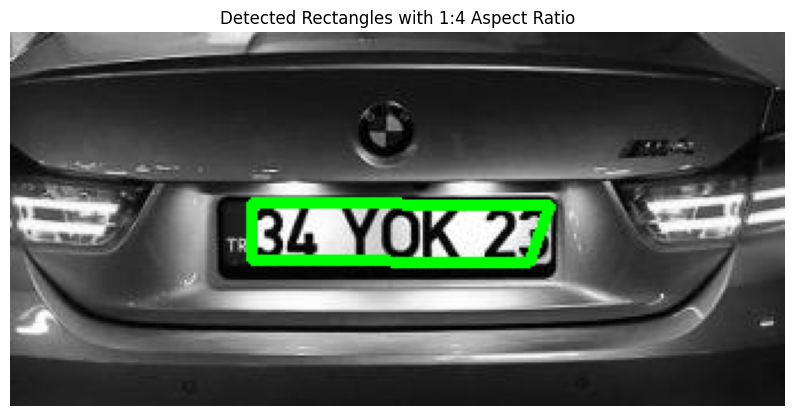

In [56]:

# Step 1: Load the image
image = cv2.imread('images_gray/test_images/test_easy1.jpg')  # Replace "image_path.jpg" with your image file
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

blurred = cv2.GaussianBlur(gray, (5, 5), 0)  # Apply Gaussian blur
_, binary = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)  # Binarize the image

# Step 2: Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 3: Identify and draw rectangles
for contour in contours:
    # Approximate the contour
    epsilon = 0.05 * cv2.arcLength(contour, True)  # Adjust epsilon as needed
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Check if the approximated contour has 4 points and is convex
    if len(approx) == 4 and cv2.isContourConvex(approx):
        # Optionally, check the aspect ratio to ensure it's a rectangle
        (x, y, w, h) = cv2.boundingRect(approx)
        aspect_ratio = float(w) / h
        print(aspect_ratio)
        if 3.2 <= aspect_ratio <= 6:
            cv2.drawContours(image, [approx], -1, (0, 255, 0), 3)  # Draw the rectangle

plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Detected Rectangles with 1:4 Aspect Ratio")
plt.axis('off')
plt.show()

1.0
0.625
1.4166666666666667
1.6666666666666667
2.2
0.6060606060606061
0.7368421052631579
1.2727272727272727
1.0
1.3333333333333333
1.5714285714285714
0.4838709677419355
1.25
1.0
1.9
1.105263157894737
0.8076923076923077
1.4444444444444444
0.23333333333333334
1.0
2.1818181818181817
0.9
0.88
1.0833333333333333
0.9285714285714286
1.9047619047619047
0.6153846153846154
1.6666666666666667
3.0
2.75
1.875
1.1111111111111112
0.75
0.6060606060606061
1.3548387096774193
0.42105263157894735
1.5
1.5555555555555556
0.8571428571428571
1.0
1.8181818181818181
1.75
2.4
3.0833333333333335
2.3333333333333335
0.6666666666666666
0.6666666666666666
1.5
1.1333333333333333
0.5483870967741935
3.3636363636363638
1.0
0.22857142857142856
1.303030303030303
1.6896551724137931
1.5185185185185186
1.1666666666666667
2.3846153846153846
1.1428571428571428
1.7142857142857142
0.7432432432432432
0.7443609022556391
4.5
4.076923076923077
1.8571428571428572
1.5
0.55
1.1666666666666667
0.7272727272727273
0.7
0.34615384615384615


(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

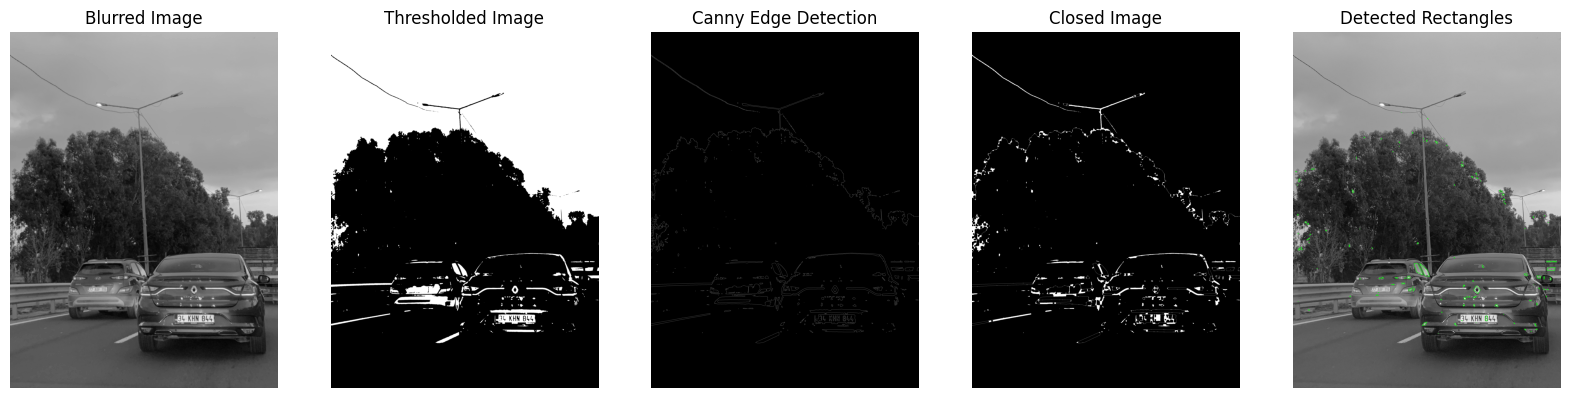

In [69]:

# Step 1: Load the image
image = cv2.imread('images_gray/train_images/train_hard_2.jpeg')  # Replace "image_path.jpg" with your image file
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

blurred = cv2.GaussianBlur(gray, (15, 15), 0)  # Apply Gaussian blur

_, binary = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)  # Apply simple thresholding

canny = cv2.Canny(binary, 100, 100)  # Apply Canny edge detection

# Apply morphological closing operation
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
closed_image = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel)

# Step 2: Find contours
contours, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 3: Identify and draw rectangles
for contour in contours:
    # Approximate the contour
    epsilon = 0.05 * cv2.arcLength(contour, True)  # Adjust epsilon as needed
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Check if the approximated contour has 4 points and is convex
    if len(approx) == 4 and cv2.isContourConvex(approx):
        # Optionally, check the aspect ratio to ensure it's a rectangle
        (x, y, w, h) = cv2.boundingRect(approx)
        aspect_ratio = float(w) / h
        print(aspect_ratio)
#        if 3.2 <= aspect_ratio <= 6:
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 3)  # Draw the rectangle

plt.figure(figsize=(20, 15))
plt.subplot(1, 5, 1)
plt.imshow(blurred, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(binary, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(canny, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(closed_image, cmap='gray')
plt.title('Closed Image')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Detected Rectangles')
plt.axis('off')


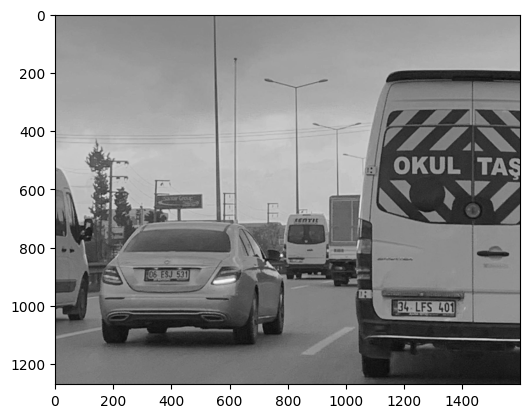

In [ ]:
test_hard3 = cv2.imread('images_gray/test_images/test_hard_3.jpeg')
test_hard4 = cv2.imread('images_gray/test_images/test_hard_4.jpeg')
test_hard5 = cv2.imread('images_gray/test_images/test_hard_5.jpeg')
test_hard6 = cv2.imread('images_gray/test_images/test_hard_6.jpeg')

test_hard3_gray = cv2.cvtColor(test_hard3, cv2.COLOR_BGR2GRAY)
test_hard4_gray = cv2.cvtColor(test_hard4, cv2.COLOR_BGR2GRAY)
test_hard5_gray = cv2.cvtColor(test_hard5, cv2.COLOR_BGR2GRAY)
test_hard6_gray = cv2.cvtColor(test_hard6, cv2.COLOR_BGR2GRAY)

plt.imshow(test_hard3_gray, cmap='gray')
plt.show()

Text(0.5, 1.0, 'Detected Corners')

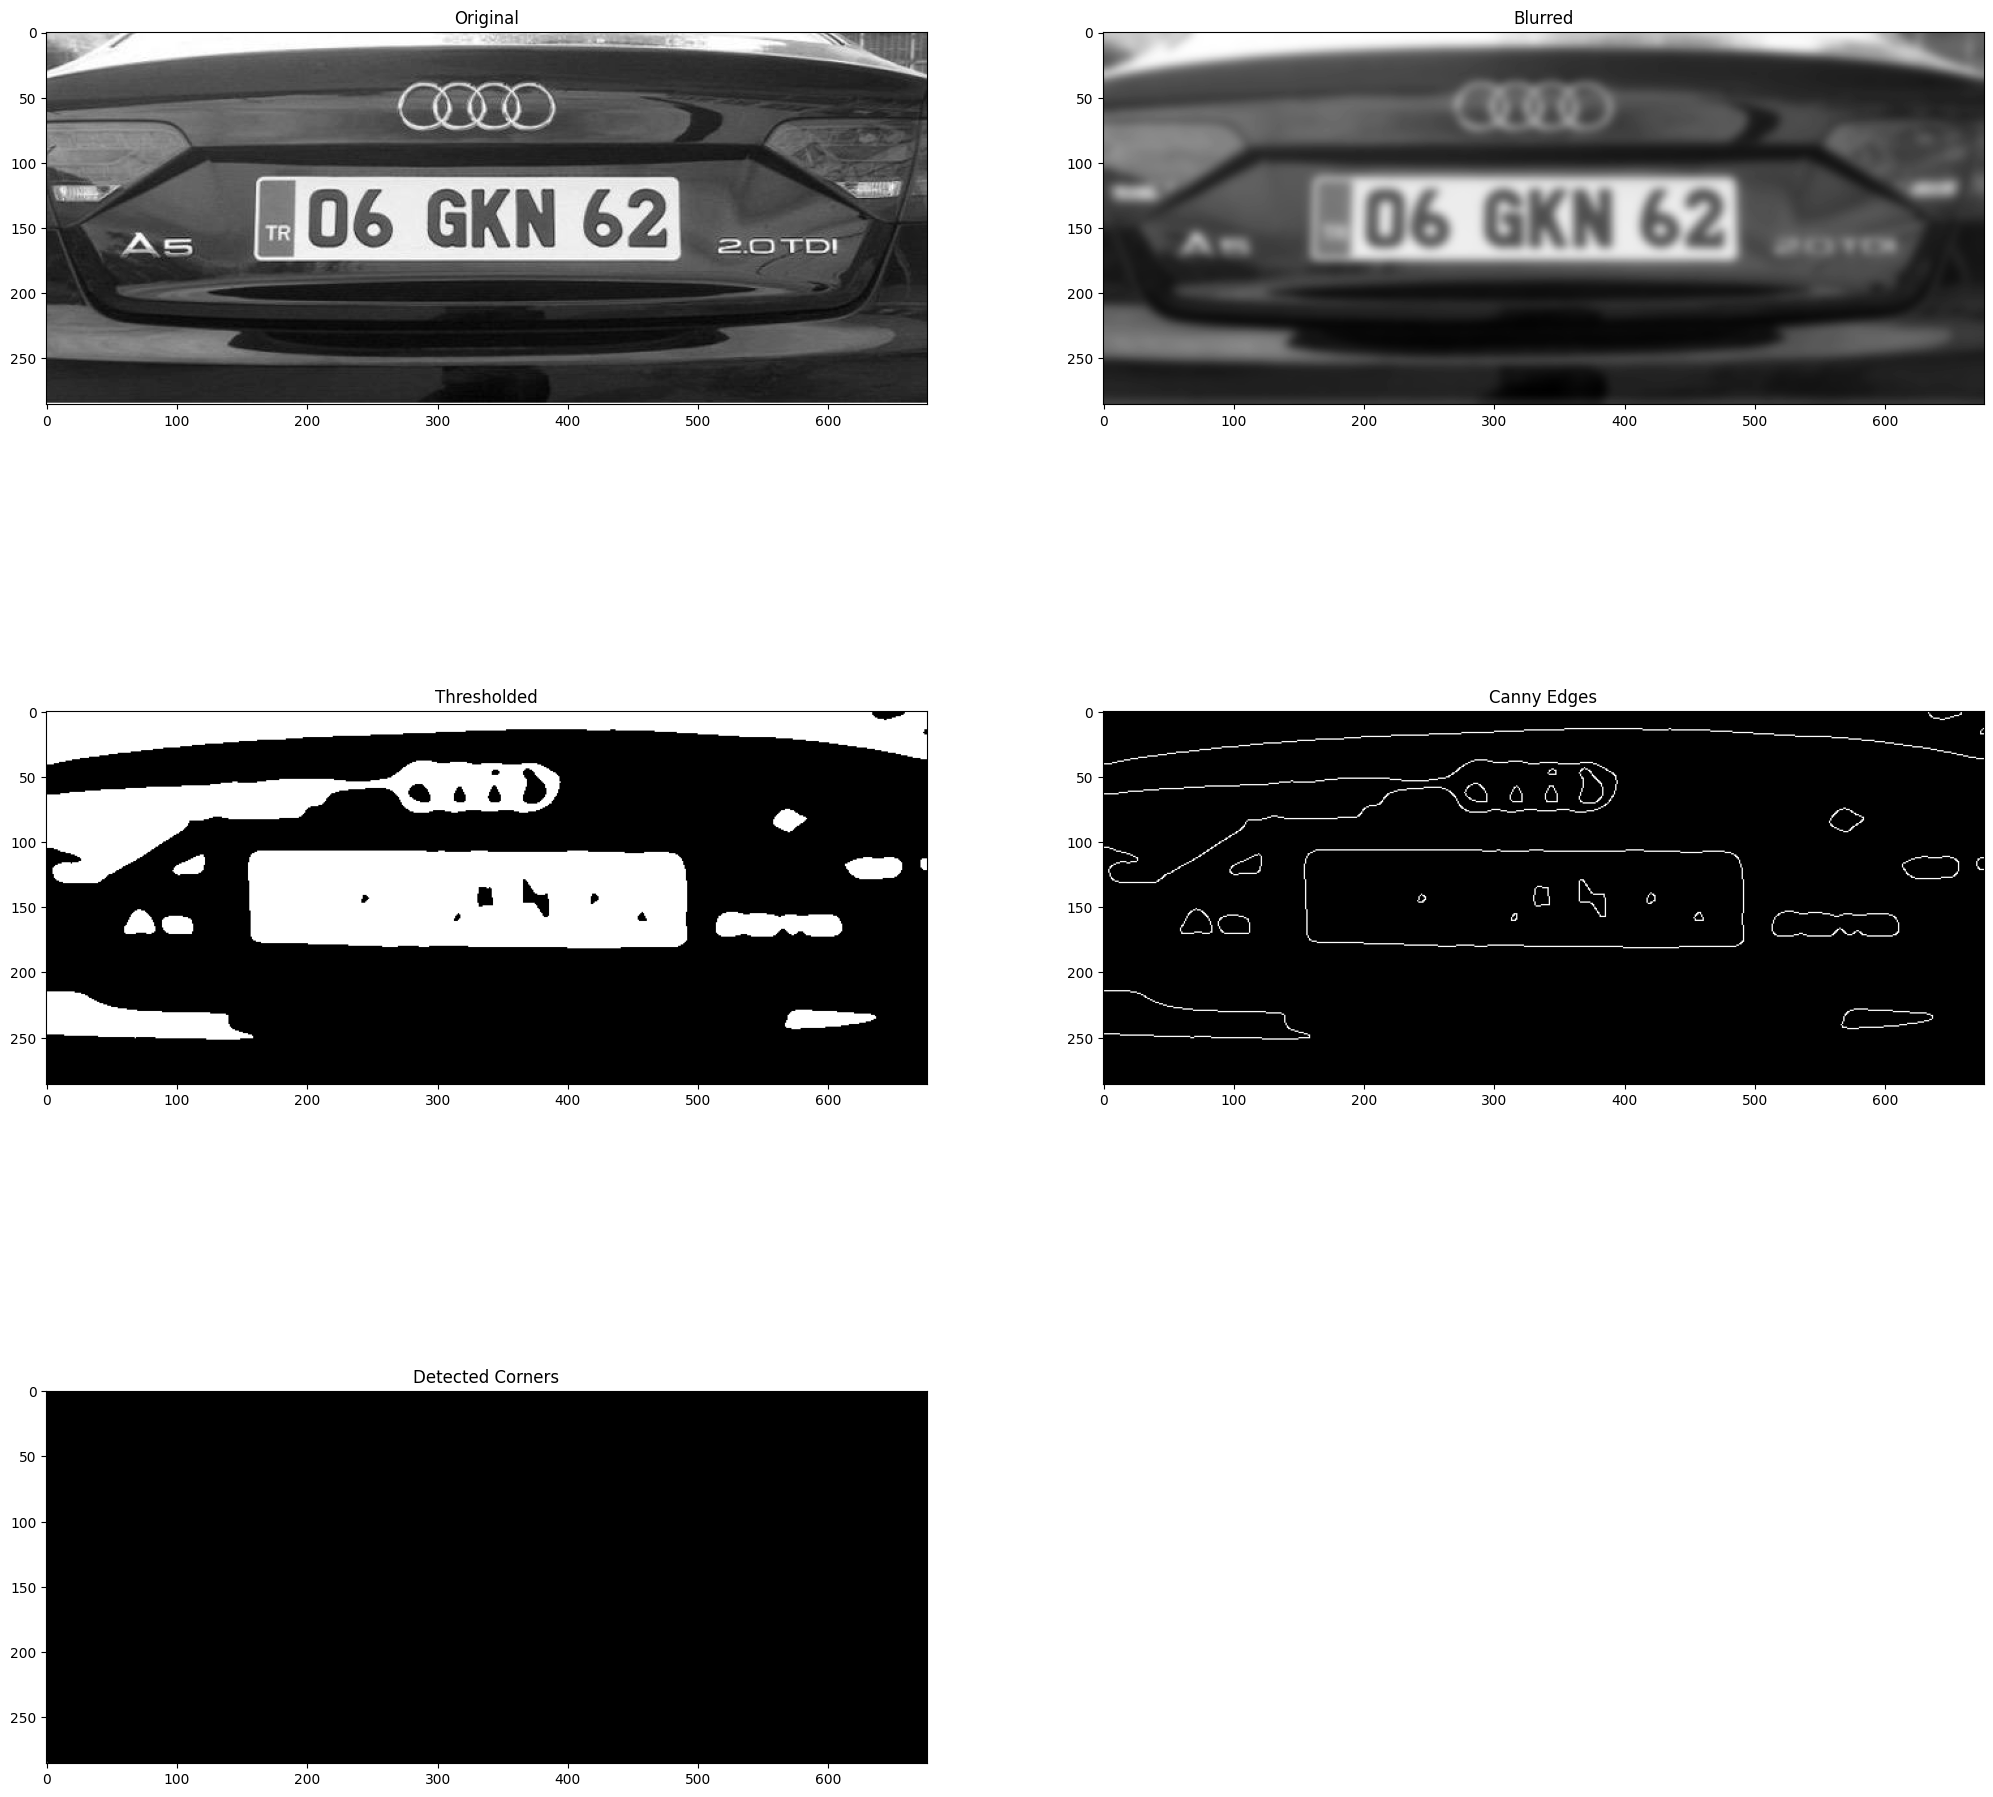

In [65]:
train_easy1 = cv2.imread('images_gray/train_images/train_easy1.jpg')

gray = cv2.cvtColor(train_easy1, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (21, 21), 0)

_, thresh = cv2.threshold(blurred, 105, 255, cv2.THRESH_BINARY)

canny = cv2.Canny(thresh, 100, 100)

# Define the hit-or-miss kernels for corner detection
hit_miss_kernel_1 = np.array([[ 1,  1,  1,  1,  1],
                              [ 1,  1,  1, -1, -1],
                              [ 1,  1, -1, -1, -1],
                              [ 1, -1, -1, -1, -1],
                              [ 1, -1, -1, -1, -1]], dtype=np.int8)

hit_miss_kernel_2 = np.array([[ 1,  1,  1,  1,  1],
                              [-1, -1,  1,  1,  1],
                              [-1, -1, -1,  1,  1],
                              [-1, -1, -1, -1,  1],
                              [-1, -1, -1, -1,  1]], dtype=np.int8)

hit_miss_kernel_3 = np.array([[-1, -1, -1, -1,  1],
                              [-1, -1, -1,  1,  1],
                              [-1, -1,  1,  1,  1],
                              [-1,  1,  1,  1,  1],
                              [ 1,  1,  1,  1,  1]], dtype=np.int8)

hit_miss_kernel_4 = np.array([[ 1, -1, -1, -1, -1],
                              [ 1, -1, -1, -1, -1],
                              [ 1,  1, -1, -1, -1],
                              [ 1,  1,  1, -1, -1],
                              [ 1,  1,  1,  1,  1]], dtype=np.int8)

# Apply hit-or-miss operation
hit_miss_1 = cv2.morphologyEx(canny, cv2.MORPH_HITMISS, hit_miss_kernel_1)
hit_miss_2 = cv2.morphologyEx(canny, cv2.MORPH_HITMISS, hit_miss_kernel_2)
hit_miss_3 = cv2.morphologyEx(canny, cv2.MORPH_HITMISS, hit_miss_kernel_3)
hit_miss_4 = cv2.morphologyEx(canny, cv2.MORPH_HITMISS, hit_miss_kernel_4)

# Combine the results to get the final corner detection
corners = hit_miss_1 | hit_miss_2 | hit_miss_3 | hit_miss_4

plt.figure(figsize=(25, 25))
plt.subplot(3,2,1)
plt.imshow(gray, cmap='gray')
plt.title('Original')

plt.subplot(3,2,2)
plt.imshow(blurred, cmap='gray')
plt.title('Blurred')

plt.subplot(3,2,3)
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded')

plt.subplot(3,2,4)
plt.imshow(canny, cmap='gray')
plt.title('Canny Edges')

plt.subplot(3,2,5)
plt.imshow(corners, cmap='gray')
plt.title('Detected Corners')


[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


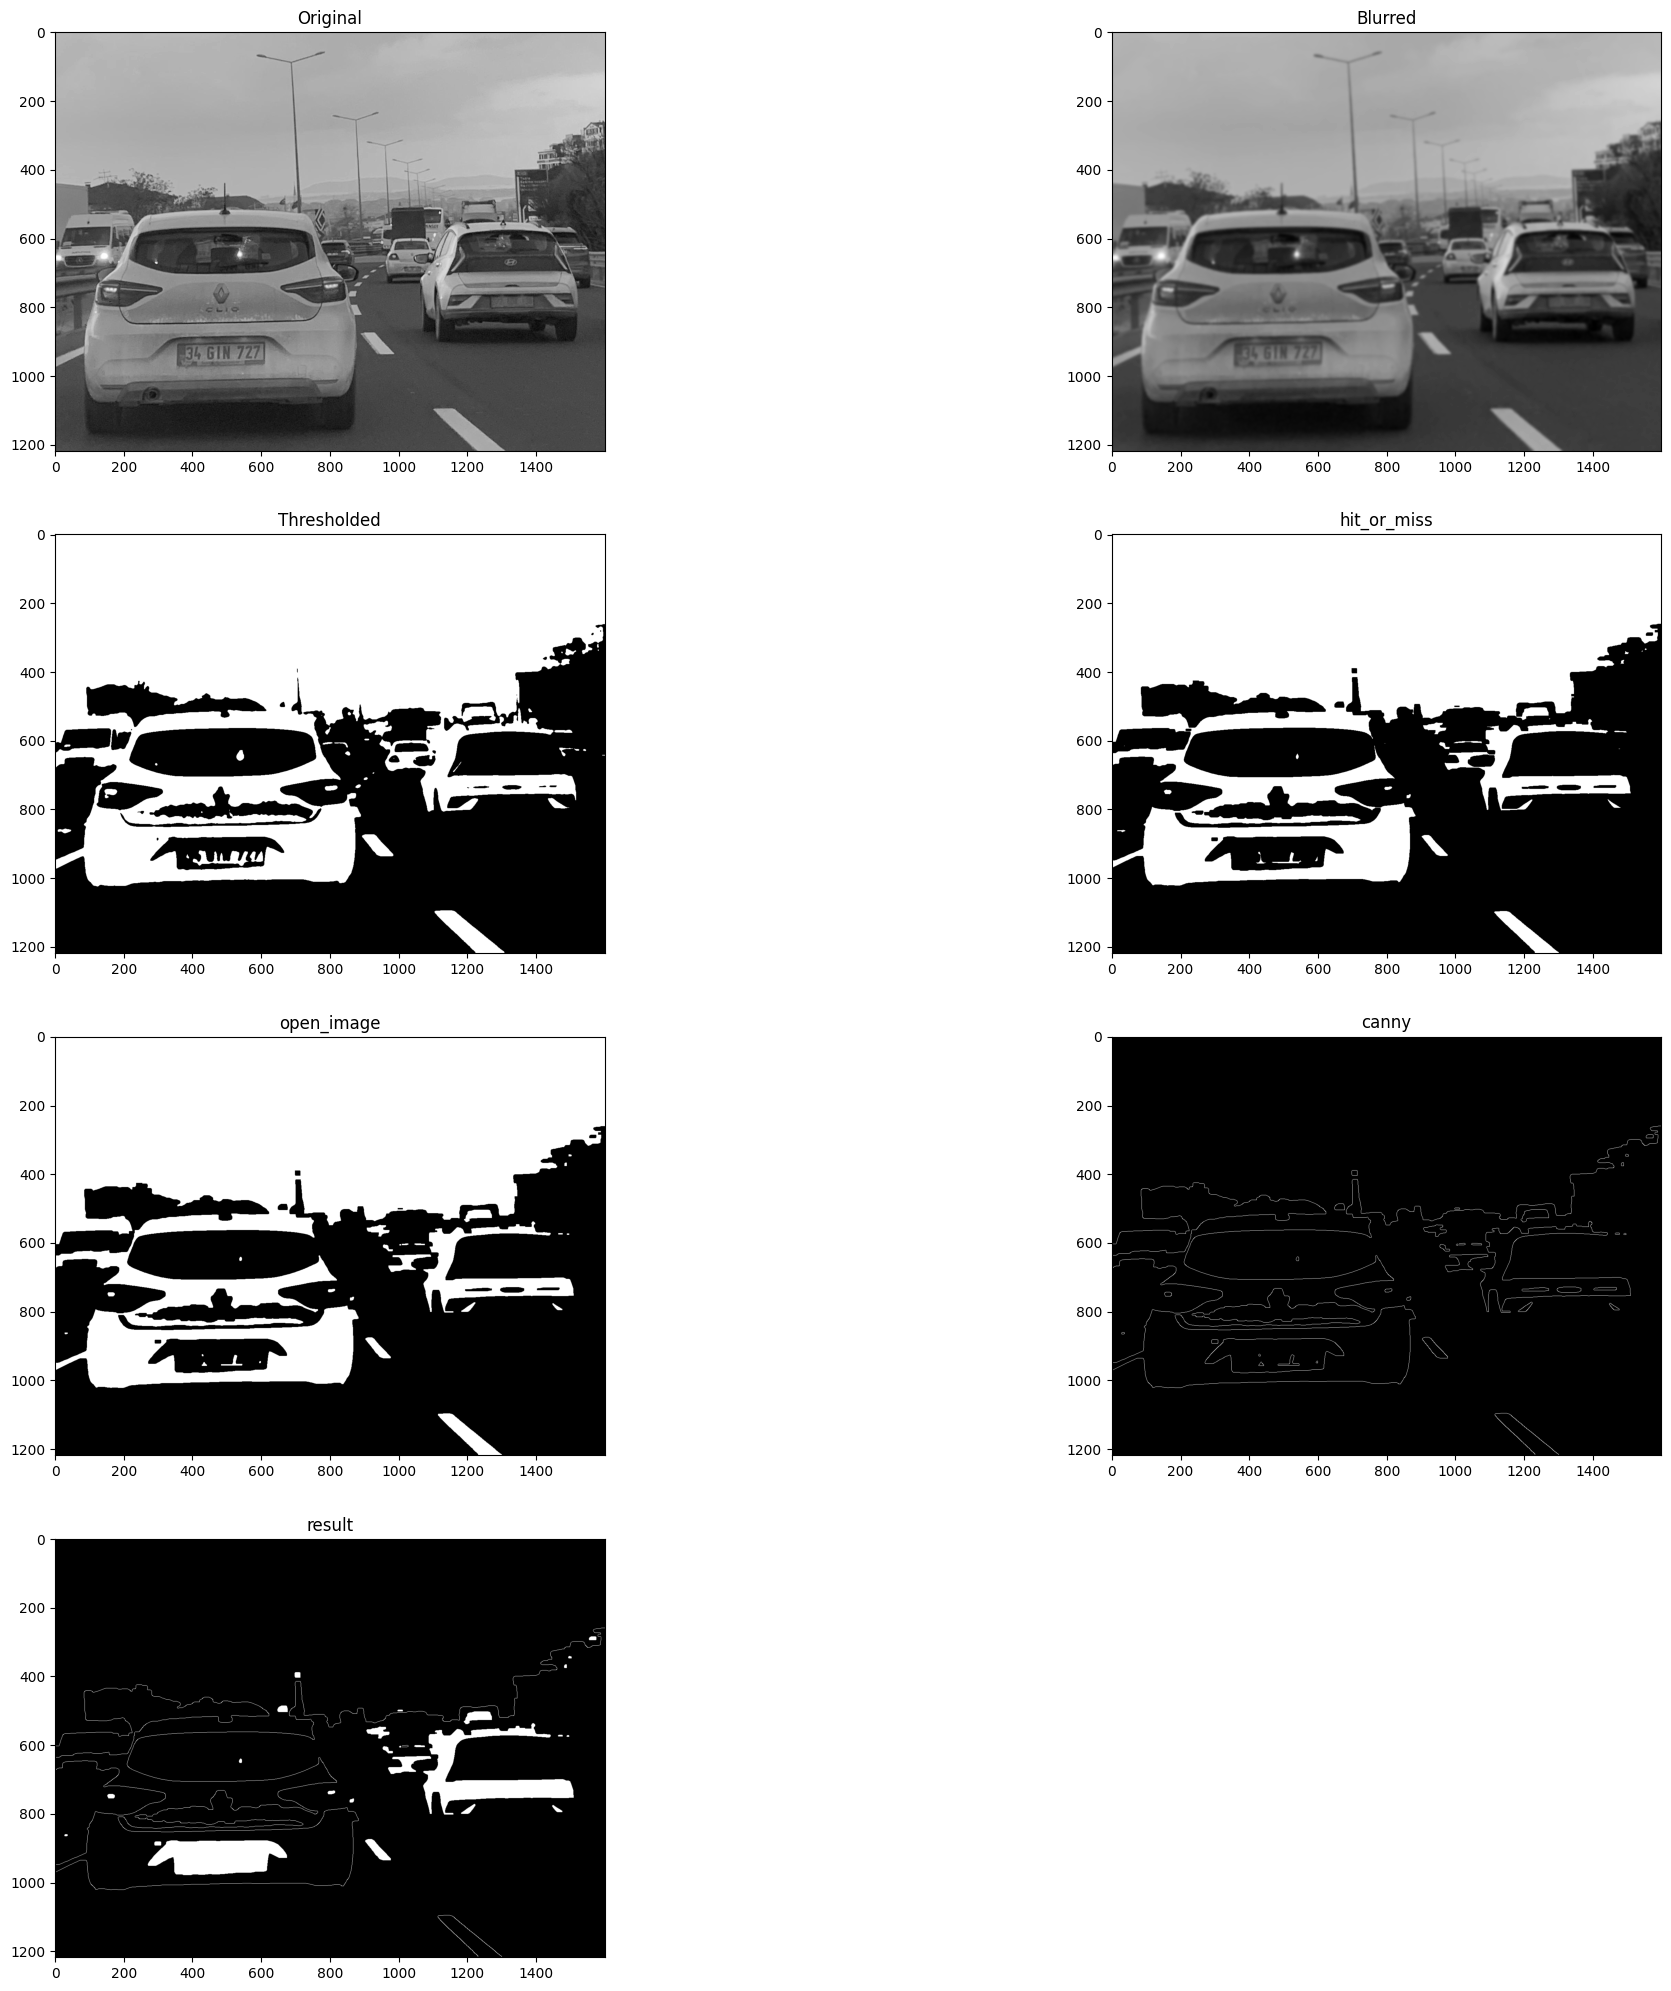

In [117]:
test_hard3 = cv2.imread('images_gray/test_images/test_hard_6.jpeg')

gray = cv2.cvtColor(test_hard3, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (21, 21), 0)

_, thresh = cv2.threshold(blurred, 105, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)


plate_structure = np.ones((4, 15), dtype=np.uint8)

print(plate_structure)

hit_or_miss = cv2.morphologyEx(thresh, cv2.MORPH_HITMISS, plate_structure)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4, 4))
open_image = cv2.morphologyEx(hit_or_miss, cv2.MORPH_OPEN, kernel)


canny = cv2.Canny(open_image, 100, 100)

contours, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_image = np.zeros_like(gray)  # Create a blank image (same size as gray)
cv2.drawContours(contour_image, contours, -1, (255, 255, 255), thickness = cv2.FILLED)  # Draw contours in white

plt.figure(figsize=(25, 25))
plt.subplot(4,2,1)
plt.imshow(gray, cmap='gray')
plt.title('Original')

plt.subplot(4,2,2)
plt.imshow(blurred, cmap='gray')
plt.title('Blurred')

plt.subplot(4,2,3)
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded')

plt.subplot(4,2,4)
plt.imshow(hit_or_miss, cmap='gray')
plt.title('hit_or_miss')

plt.subplot(4,2,5)
plt.imshow(open_image, cmap='gray')
plt.title('open_image')

plt.subplot(4,2,6)
plt.imshow(canny, cmap='gray')
plt.title('canny')

plt.subplot(4,2,7)
plt.imshow(contour_image, cmap='gray')
plt.title('result')

plt.show()

